# Northwind Database Machine Learning Project

The Northwind database is a sample database that was originally created by Microsoft and used as the basis for their tutorials in a variety of database products for decades. The Northwind database contains the sales data for a fictitious company called “Northwind Traders,” which imports and exports specialty foods from around the world. The Northwind database is an excellent tutorial schema for a small-business ERP, with customers, orders, inventory, purchasing, suppliers, shipping, employees, and single-entry accounting.

In [1]:
# import necessory libraraies
import os
import sys
from pathlib import Path
import pandas as pd
import numpy as np 
import seaborn as sns 
from sqlalchemy import create_engine
from dotenv import load_dotenv

In [2]:
# Path to the dataset
ROOT_DIR = Path.cwd().parents[2]
DATA_DIR = ROOT_DIR / "data" / "files" 
ENV_FILE = ROOT_DIR / "env" / ".env"  
NORTHWIND_CSV = DATA_DIR / "northwind_data.csv"

In [3]:
load_dotenv(ENV_FILE)
DB_CREDENTIALS = os.getenv("DB_STRING")

In [4]:
DB_ENGINE = create_engine(DB_CREDENTIALS)


In [5]:
SQL_QUERY = """ 
SET SCHEMA 'northwind';
-- merge all tables
SELECT
    -- orders
    ord.orderdate,ord.requireddate, ord.shippeddate, ord.shipvia, ord.freight,
    ord.shipname, ord.shipaddress, ord.shipcity, ord.shipregion,
    ord.shippostalcode, ord.shipcountry,
    -- order details
    odd.unitprice AS order_details_unitprice,
    odd.quantity AS order_details_quantity,
    odd.discount AS order_details_discount,
    -- customers
    cus.companyname AS customers_companyname, 
    cus.contactname AS customers_contactname, 
    cus.contacttitle AS customers_contacttitle, 
    cus.address AS customers_address, 
    cus.city AS customers_city,
    cus.region AS customers_region, 
    cus.postalcode AS customers_postalcode, 
    cus.country AS customers_country, 
    cus.phone AS customers_phone, 
    cus.fax AS customers_fax,
    -- products
    pro.productname,
    pro.quantityperunit AS products_quantity_per_unit,
    pro.unitprice AS products_unitprice,
    pro.unitsinstock AS products_units_in_stock,
    pro.unitsonorder AS products_units_on_order,
    pro.reorderlevel AS products_reorder_level,
    pro.discontinued AS products_discontinued,
    -- categories
    cat.categoryname,
    cat.description AS categories_description,
    cat.picture AS categories_picture,
    -- employees
    emp.lastname AS employees_lastname,
    emp.firstname AS employees_firstname,
    emp.title AS employees_title,
    emp.titleofcourtesy AS employees_title_of_courtesy,
    emp.birthdate AS employees_birthdate,
    emp.hiredate AS employees_hiredate,
    emp.address AS employees_address,
    emp.city AS employees_city, emp.region AS employees_region,
    emp.postalcode AS employees_postalcode,
    emp.country AS employees_country,
    emp.homephone AS employees_homephone,
    emp.extension AS employees_extension,
    emp.photo AS employees_photo,
    emp.notes AS employees_notes,
    emp.reportsto AS employees_reportsto,
    emp.photopath AS employees_photo_path,
    -- employee_territories
    empt.territoryid AS employee_territories_id,
    -- suppliers
    sup.companyname AS suppliers_company_name,
    sup.contactname AS suppliers_contact_name,
    sup.contacttitle AS suppliers_contact_title,
    sup.address AS suppliers_address,
    sup.city AS suppliers_city, sup.region AS suppliers_region,
    sup.postalcode AS suppliers_postalcode,
    sup.country AS suppliers_country,
    sup.phone AS suppliers_phone, sup.fax As suppliers_fax,
    sup.homepage AS suppliers_homepage,
    -- shippers: no relationship found in orders
    -- shi.companyname AS shippers_company_name,
    -- shi.phone AS shippers_phone,
    -- territories
    ter.territorydescription AS territories_description,
    -- regions
    reg.regiondescription AS region_description
FROM orders ord

LEFT JOIN order_details odd ON ord.orderid = odd.orderid
LEFT JOIN customers cus ON ord.customerid = cus.customerid
LEFT JOIN products pro ON odd.productid = pro.productid
LEFT JOIN categories cat ON pro.productid = cat.categoryid
LEFT JOIN employees emp ON ord.employeeid = emp.employeeid
LEFT JOIN employee_territories empt ON emp.employeeid = empt.employeeid
LEFT JOIN suppliers sup ON pro.supplierid = sup.supplierid
-- LEFT JOIN shippers shi ON ord.shipperid = shi.shipperid
LEFT JOIN territories ter ON empt.territoryid = ter.territoryid
LEFT JOIN regions reg ON ter.regionid = reg.regionid;
"""

In [ ]:
# northwind_dataset = pd.read_sql(SQL_QUERY, DB_ENGINE)
# northwind_dataset.to_csv(NORTHWIND_CSV, index=False)

In [6]:
northwind_df = pd.read_csv(NORTHWIND_CSV)
northwind_df.head()

,orderdate,requireddate,shippeddate,shipvia,freight,shipname,shipaddress,shipcity,shipregion,shippostalcode,...,suppliers_address,suppliers_city,suppliers_region,suppliers_postalcode,suppliers_country,suppliers_phone,suppliers_fax,suppliers_homepage,territories_description,region_description
0,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,...,Calle del Rosal 4,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN,Fairport,Eastern
1,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,...,Calle del Rosal 4,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN,Mellvile,Eastern
2,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,...,Calle del Rosal 4,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN,NewYork,Eastern
3,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,...,Calle del Rosal 4,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN,NewYork,Eastern
4,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,...,Calle del Rosal 4,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN,Edison,Eastern


In [7]:
northwind_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 65 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   orderdate                    10129 non-null  object 
 1   requireddate                 10129 non-null  object 
 2   shippeddate                  9840 non-null   object 
 3   shipvia                      10129 non-null  int64  
 4   freight                      10129 non-null  float64
 5   shipname                     10129 non-null  object 
 6   shipaddress                  10129 non-null  object 
 7   shipcity                     10129 non-null  object 
 8   shipregion                   3864 non-null   object 
 9   shippostalcode               9821 non-null   object 
 10  shipcountry                  10129 non-null  object 
 11  order_details_unitprice      10129 non-null  float64
 12  order_details_quantity       10129 non-null  int64  
 13  order_details_di

In [8]:
northwind_df.describe()

,shipvia,freight,order_details_unitprice,order_details_quantity,order_details_discount,products_unitprice,products_units_in_stock,products_units_on_order,products_reorder_level,employees_extension,employees_reportsto,employee_territories_id
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,8442.000000,10129.000000
mean,1.997236,101.391841,26.519361,24.343963,0.058074,28.177478,39.567085,8.161714,11.786455,2686.938888,3.190121,39445.883503
std,0.777086,142.631067,30.607125,19.410689,0.084065,32.381825,36.098826,19.840824,10.761393,1778.407490,1.467730,32149.598006
min,1.000000,0.020000,2.000000,1.000000,0.000000,2.500000,0.000000,0.000000,0.000000,428.000000,2.000000,1581.000000
25%,1.000000,19.640000,12.000000,10.000000,0.000000,12.500000,17.000000,0.000000,0.000000,465.000000,2.000000,10038.000000
50%,2.000000,55.120000,18.400000,20.000000,0.000000,19.450000,25.000000,0.000000,10.000000,3355.000000,2.000000,31406.000000
75%,3.000000,123.830000,32.800000,30.000000,0.100000,34.000000,57.000000,0.000000,20.000000,3457.000000,5.000000,60179.000000
max,3.000000,1007.640000,263.500000,130.000000,0.250000,263.500000,125.000000,100.000000,30.000000,5467.000000,5.000000,98104.000000


In [10]:
northwind_df.shape

(10129, 65)

In [11]:
northwind_df.columns.tolist()

['orderdate',
 'requireddate',
 'shippeddate',
 'shipvia',
 'freight',
 'shipname',
 'shipaddress',
 'shipcity',
 'shipregion',
 'shippostalcode',
 'shipcountry',
 'order_details_unitprice',
 'order_details_quantity',
 'order_details_discount',
 'customers_companyname',
 'customers_contactname',
 'customers_contacttitle',
 'customers_address',
 'customers_city',
 'customers_region',
 'customers_postalcode',
 'customers_country',
 'customers_phone',
 'customers_fax',
 'productname',
 'products_quantity_per_unit',
 'products_unitprice',
 'products_units_in_stock',
 'products_units_on_order',
 'products_reorder_level',
 'products_discontinued',
 'categoryname',
 'categories_description',
 'categories_picture',
 'employees_lastname',
 'employees_firstname',
 'employees_title',
 'employees_title_of_courtesy',
 'employees_birthdate',
 'employees_hiredate',
 'employees_address',
 'employees_city',
 'employees_region',
 'employees_postalcode',
 'employees_country',
 'employees_homephone',
 'em

In [12]:
# Check data types and missing values

data_info = pd.DataFrame({
    'Data Type': northwind_df.dtypes,
    'Missing Values': northwind_df.isnull().sum(),
    'Missing %': (northwind_df.isnull().sum() / len(northwind_df) * 100).round(2),
    'Unique Values': northwind_df.nunique()
})
print(data_info)

                        Data Type  Missing Values  Missing %  Unique Values
orderdate                  object               0       0.00            480
requireddate               object               0       0.00            454
shippeddate                object             289       2.85            387
shipvia                     int64               0       0.00              3
freight                   float64               0       0.00            799
...                           ...             ...        ...            ...
suppliers_phone            object               0       0.00             29
suppliers_fax              object            5715      56.42             13
suppliers_homepage         object            7667      75.69              5
territories_description    object               0       0.00             48
region_description         object               0       0.00              4

[65 rows x 4 columns]


1. Group customers into categories to understand the best customers.
2. Business Question: customers to focud for maximum profit.
3. customer segmentation (Clustering)

In [16]:
# Customer Summary Dataset

customer_summary = northwind_df.groupby('customers_companyname')
customer_summary = customer_summary.agg({
    'orderdate': ['min', 'max', 'count'],
    'freight': 'sum',
    'order_details_unitprice': 'mean',
    'order_details_quantity': 'sum'
})
customer_summary.head()

orderdate                    freight  \
                                           min         max count      sum   
customers_companyname                                                       
Alfreds Futterkiste                 1997-08-25  1998-04-09    40  1218.08   
Ana Trujillo Emparedados y helados  1996-09-18  1998-03-04    48  1086.00   
Antonio Moreno Taquería             1996-11-27  1998-01-28    90  4687.00   
Around the Horn                     1996-11-15  1998-04-10   111  5227.13   
B's Beverages                       1996-08-26  1998-04-14   108  2346.99   

                                   order_details_unitprice  \
                                                      mean   
customers_companyname                                        
Alfreds Futterkiste                              25.247500   
Ana Trujillo Emparedados y helados               21.541667   
Antonio Moreno Taquería                          24.031778   
Around the Horn                                  20.420270   
B's Beverages                                    22.002778   

                                   order_details_quantity  
                                                      sum  
customers_companyname                                      
Alfreds Futterkiste                                   623  
Ana Trujillo Emparedados y helados                    259  
Antonio Moreno Taquería                              1958  
Around the Horn                                      2568  
B's Beverages                                        1489

In [18]:
# Calculate the value of each order line
# Order line value = unit price * quantity * (1- discount)
northwind_df['order_line_value'] = (
    northwind_df['order_details_unitprice'] *
    northwind_df['order_details_quantity'] *
    (1 - northwind_df['order_details_discount'])
)
northwind_df.head()

,orderdate,requireddate,shippeddate,shipvia,freight,shipname,shipaddress,shipcity,shipregion,shippostalcode,...,suppliers_city,suppliers_region,suppliers_postalcode,suppliers_country,suppliers_phone,suppliers_fax,suppliers_homepage,territories_description,region_description,order_line_value
0,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,...,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN,Fairport,Eastern,168.0
1,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,...,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN,Mellvile,Eastern,168.0
2,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,...,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN,NewYork,Eastern,168.0
3,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,...,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN,NewYork,Eastern,168.0
4,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,...,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN,Edison,Eastern,168.0


In [19]:
northwind_df['order_line_value'].iloc[0]

np.float64(168.0)

In [20]:
# Group by customer to create customer-level features
customer_summary = northwind_df.groupby('customers_companyname').agg({
    'order_line_value': ['sum', 'mean', 'count'],  # Total spent, average order value, number of orders
    'order_details_quantity': 'sum',  # Total items purchased
    'order_details_discount': 'mean',  # Average discount received
    'productname': 'nunique',  # How many different products they buy
    'orderdate': ['min', 'max']  # First and last order dates
}).reset_index()

In [22]:
# Flatten the column names
customer_summary.columns = [
    'customer_name',
    'total_spent',
    'avg_order_value',
    'order_count',
    'total_items',
    'avg_discount',
    'unique_products',
    'first_order',
    'last_order'
]
customer_summary.head()

,customer_name,total_spent,avg_order_value,order_count,total_items,avg_discount,unique_products,first_order,last_order
0,Alfreds Futterkiste,14064.500,351.612500,40,623,0.111250,11,1997-08-25,1998-04-09
1,Ana Trujillo Emparedados y helados,5630.200,117.295833,48,259,0.000000,10,1996-09-18,1998-03-04
2,Antonio Moreno Taquería,41514.705,461.274500,90,1958,0.053333,15,1996-11-27,1998-01-28
3,Around the Horn,60560.250,545.587838,111,2568,0.020270,24,1996-11-15,1998-04-10
4,B's Beverages,28299.900,262.036111,108,1489,0.000000,19,1996-08-26,1998-04-14


In [26]:
# Explore customer data
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100


In [28]:
print(f"We have {len(customer_summary)} customers to analyze")


We have 89 customers to analyze


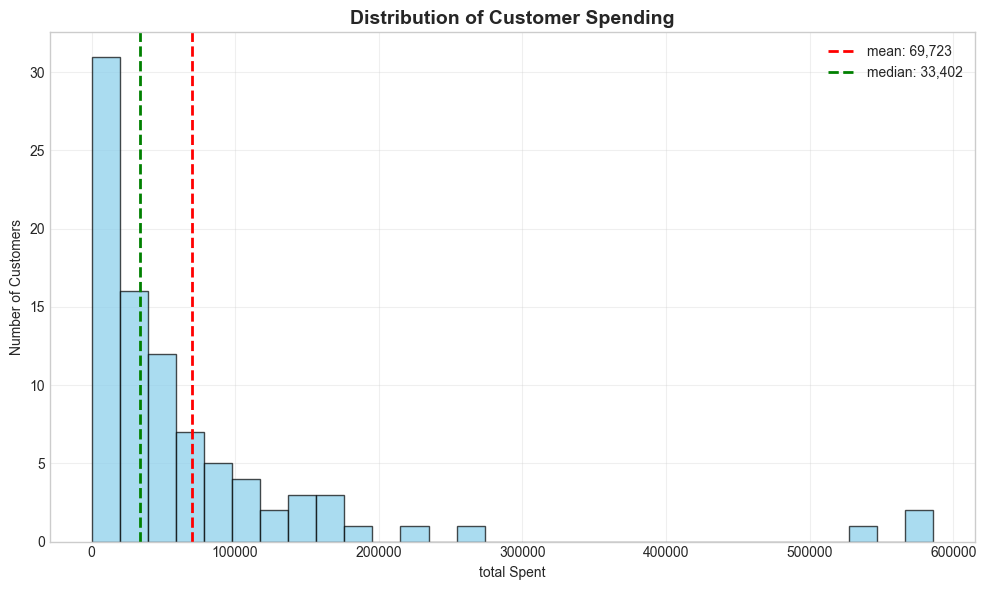

In [ ]:
# Visualization one by one

# 1. Distribution of total spending
plt.figure(figsize=(10, 6))
plt.hist(customer_summary['total_spent'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('total Spent')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Spending', fontweight='bold', fontsize=14)
# plt.show()

# Add mean line
mean_spent = customer_summary['total_spent'].mean()
plt.axvline(mean_spent, color='red', linestyle='--', linewidth=2, label=f'mean: {mean_spent:,.0f}')
# plt.legend()

# Add median line
median_spent = customer_summary['total_spent'].median()
plt.axvline(median_spent, color='green', linestyle='--', linewidth=2, label=f'median: {median_spent:,.0f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

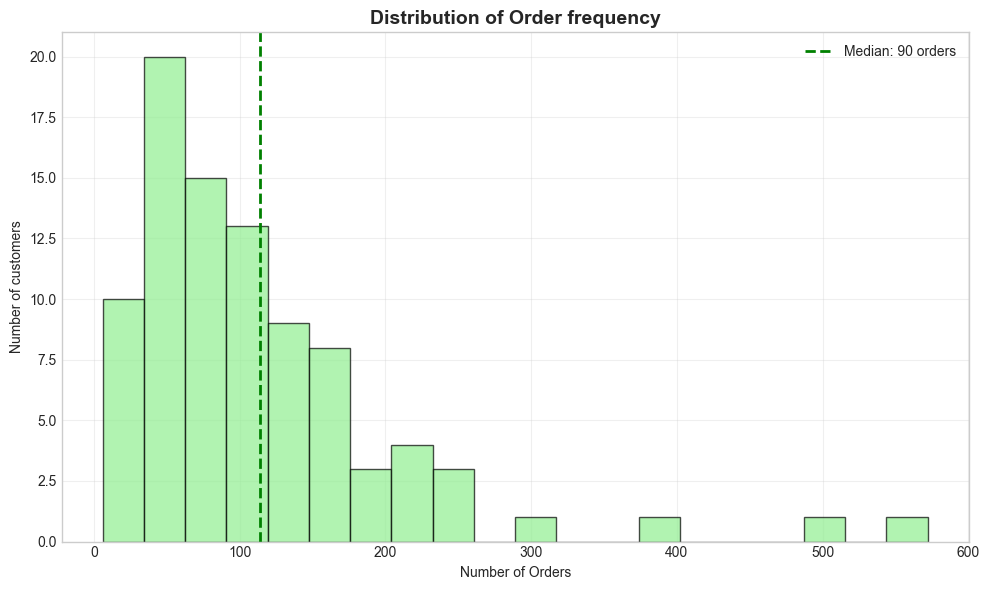

In [34]:
# 2. Order frequency distribution

plt.figure(figsize=(10, 6))
plt.hist(customer_summary['order_count'], bins=20, edgecolor='black', alpha=0.7, color='lightgreen')
plt.xlabel('Number of Orders')
plt.ylabel('Number of customers')
plt.title('Distribution of Order frequency', fontweight='bold', fontsize=14)
# plt.show()

# Add statistics
mean_orders = customer_summary['order_count'].mean()
median_orders = customer_summary['order_count'].median()
plt.axvline(mean_orders, color='green', linestyle='--', linewidth=2, label=f'Median: {median_orders:.0f} orders')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


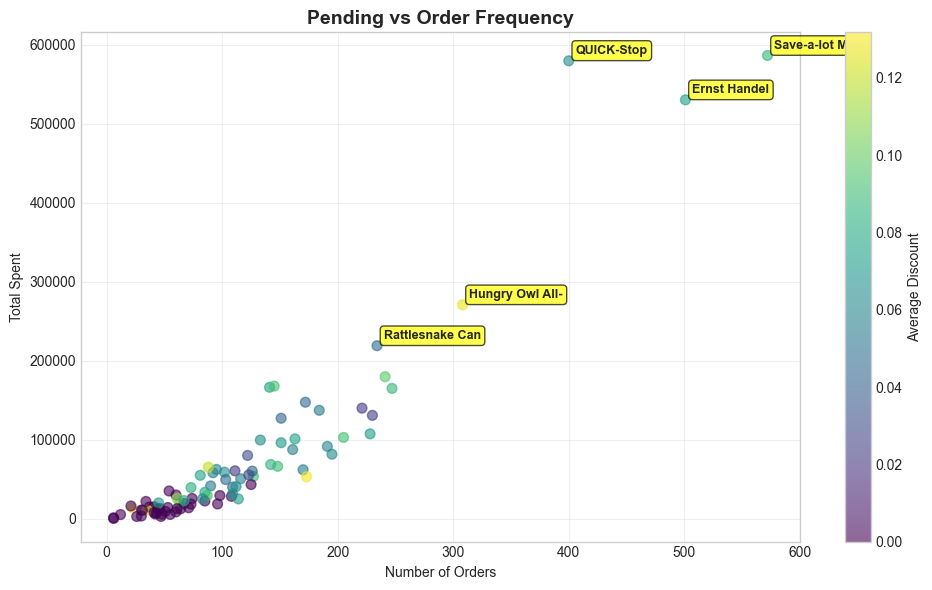

In [40]:
# 3. Scatter plot: Orders vs Spending

plt.figure(figsize=(10, 6))
scatter = plt.scatter(customer_summary['order_count'], customer_summary['total_spent'],
            alpha=0.6, s=50, c=customer_summary['avg_discount'], cmap='viridis')
plt.xlabel('Number of Orders')
plt.ylabel('Total Spent')
plt.title('Pending vs Order Frequency', fontweight='bold', fontsize=14)
plt.colorbar(scatter,label='Average Discount')

# Highlight top 5 customers
top_5 = customer_summary.nlargest(5, 'total_spent')
for idx, row in top_5.iterrows():
    plt.annotate(row['customer_name'][:15], # show first 15 characters
               (row['order_count'], row['total_spent']),
               xytext=(5, 5), textcoords='offset points', fontsize=9, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))
    
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

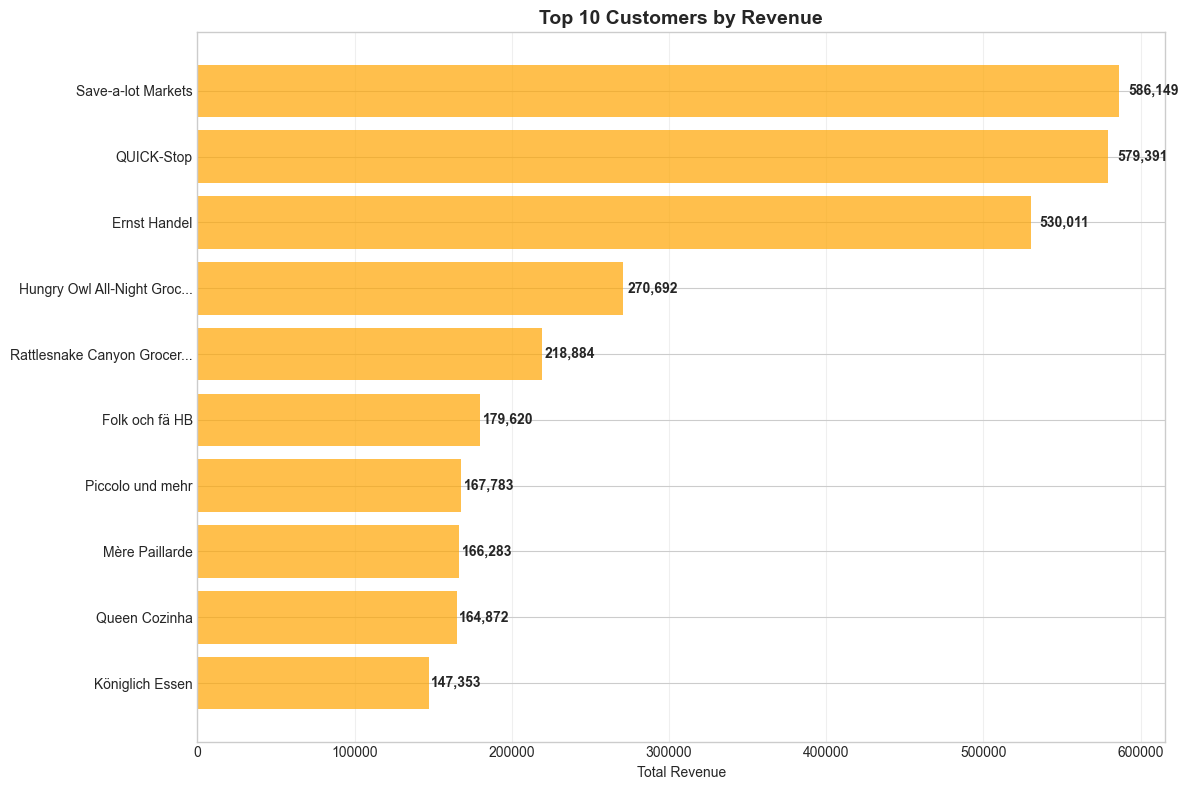

In [41]:
# 4. Top 10 Customers

plt.figure(figsize=(12, 8))
top_10 = customer_summary.nlargest(10, 'total_spent')

# create horizontal bar chart
bars = plt.barh(range(len(top_10)), top_10['total_spent'], color='orange', alpha=0.7)
plt.yticks(range(len(top_10)), [name[:25] + '...' if len(name) > 25 else name
                                for name in top_10['customer_name']])
plt.xlabel('Total Revenue')
plt.title('Top 10 Customers by Revenue', fontweight='bold', fontsize=14)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width * 1.01, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}', ha='left', va='center', fontsize=10, fontweight='bold')
    
plt.gca().invert_yaxis() # highest on top
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


In [45]:
# The 80/20 Rule (Pareto Analysis)
sorted_customers = customer_summary.sort_values(by='total_spent', ascending=False).copy()


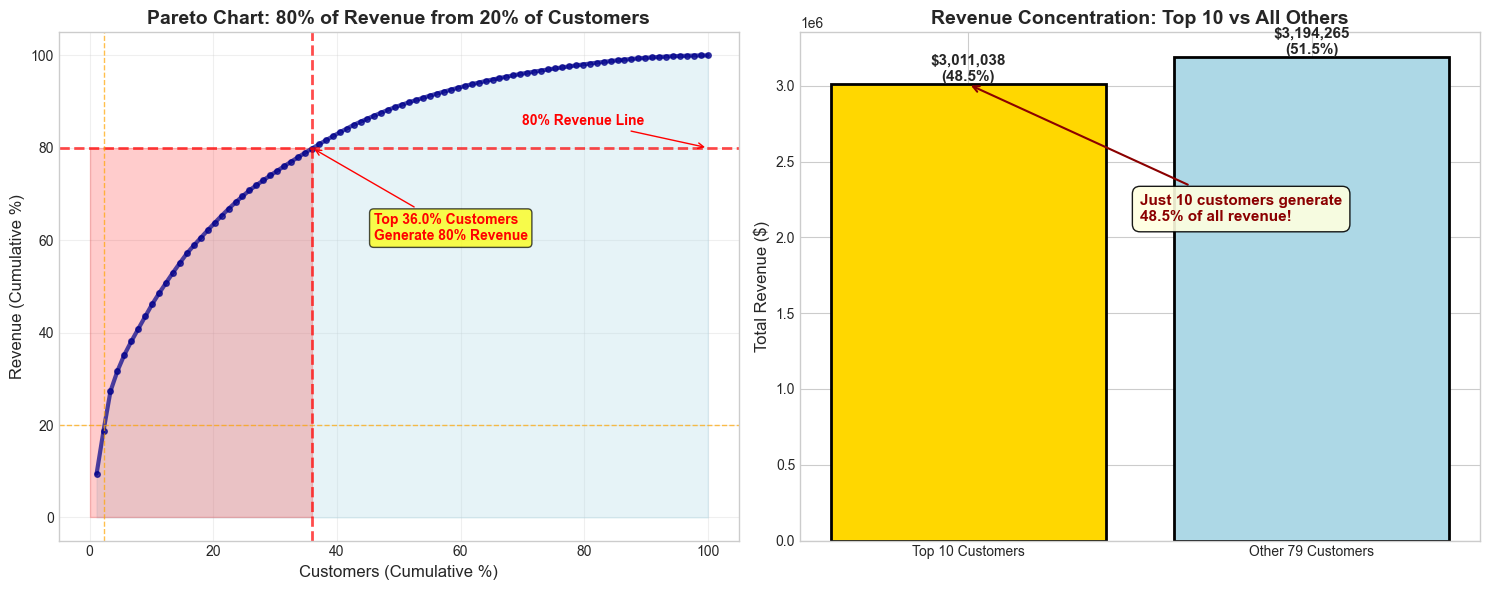

In [47]:
# Calculate cumulative metrics
sorted_customers['cumulative_spent'] = sorted_customers['total_spent'].cumsum()
sorted_customers['cumulative_percent'] = (sorted_customers['cumulative_spent'] / 
                                         sorted_customers['total_spent'].sum() * 100)

sorted_customers['customer_rank'] = range(1, len(sorted_customers) + 1)
sorted_customers['customer_percent'] = (sorted_customers['customer_rank'] / 
                                       len(sorted_customers) * 100)

# Find where 80% of revenue comes from
revenue_80_customers = sorted_customers[sorted_customers['cumulative_percent'] <= 80]
revenue_20_customers = sorted_customers[sorted_customers['cumulative_percent'] <= 20]

# Calculate exact numbers
num_customers_80 = len(revenue_80_customers)
percent_customers_80 = (num_customers_80 / len(sorted_customers) * 100)

num_customers_20 = len(revenue_20_customers)
percent_customers_20 = (num_customers_20 / len(sorted_customers) * 100)

# Find the tipping point
top_10_percent = int(len(sorted_customers) * 0.1)
top_10_revenue = sorted_customers.head(top_10_percent)['total_spent'].sum()
top_10_revenue_share = (top_10_revenue / sorted_customers['total_spent'].sum() * 100)

# Visualize the Pareto Principle
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pareto Curve
ax1.plot(sorted_customers['customer_percent'], sorted_customers['cumulative_percent'], 
        linewidth=3, color='darkblue', marker='o', markersize=4, alpha=0.7)

# Add reference lines
ax1.axhline(80, color='red', linestyle='--', alpha=0.7, linewidth=2)
ax1.axvline(percent_customers_80, color='red', linestyle='--', alpha=0.7, linewidth=2)
ax1.axhline(20, color='orange', linestyle='--', alpha=0.7, linewidth=1)
ax1.axvline(percent_customers_20, color='orange', linestyle='--', alpha=0.7, linewidth=1)

# Fill areas
ax1.fill_between(sorted_customers['customer_percent'], 0, sorted_customers['cumulative_percent'], 
                alpha=0.3, color='lightblue')
ax1.fill_betweenx([0, 80], 0, percent_customers_80, alpha=0.2, color='red')

ax1.set_xlabel('Customers (Cumulative %)', fontsize=12)
ax1.set_ylabel('Revenue (Cumulative %)', fontsize=12)
ax1.set_title('Pareto Chart: 80% of Revenue from 20% of Customers', 
             fontweight='bold', fontsize=14)
ax1.grid(True, alpha=0.3)

# Add annotations
ax1.annotate(f'80% Revenue Line', xy=(100, 80), xytext=(70, 85),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=10, color='red', fontweight='bold')

ax1.annotate(f'Top {percent_customers_80:.1f}% Customers\nGenerate 80% Revenue', 
            xy=(percent_customers_80, 80), xytext=(percent_customers_80 + 10, 60),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=10, color='red', fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))

# Bar chart: Top 10 customers vs Others
top_10_revenue = sorted_customers.head(10)['total_spent'].sum()
others_revenue = sorted_customers.iloc[10:]['total_spent'].sum()

categories = ['Top 10 Customers', 'Other 79 Customers']
revenues = [top_10_revenue, others_revenue]
colors = ['gold', 'lightblue']

bars = ax2.bar(categories, revenues, color=colors, edgecolor='black', linewidth=2)

ax2.set_ylabel('Total Revenue ($)', fontsize=12)
ax2.set_title('Revenue Concentration: Top 10 vs All Others', 
             fontweight='bold', fontsize=14)

# Add value labels on bars
for bar, revenue in zip(bars, revenues):
    height = bar.get_height()
    percentage = (revenue / (top_10_revenue + others_revenue) * 100)
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'${revenue:,.0f}\n({percentage:.1f}%)', 
            ha='center', va='bottom', fontsize=11, fontweight='bold')
    

# Add annotations explaining impact
top_10_percentage = (top_10_revenue / (top_10_revenue + others_revenue) * 100)
ax2.annotate(f'Just 10 customers generate\n{top_10_percentage:.1f}% of all revenue!',
            xy=(0, top_10_revenue), xytext=(0.5, top_10_revenue * 0.7),
            arrowprops=dict(arrowstyle='->', color='darkred', linewidth=1.5),
            fontsize=11, fontweight='bold', color='darkred',
            bbox=dict(boxstyle="round,pad=0.5", facecolor='lightyellow', alpha=0.9))

plt.tight_layout()
plt.show()
